<a href="https://colab.research.google.com/github/Trading-com-Dados/Jornada-Quant/blob/main/20211012_JQ_Diferentes_aportes_Vers%C3%A3o_Completa_Compara%C3%A7%C3%A3o_Carteira_vs_IBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código para comparação de uma carteira fictícia vs IBOV

## 1. Instalando e importando bibliotecas

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 6.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=13814bb6725b9f67ef68d4a45118768ea99566e0f1702f434c359bb600a1a537
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

## 2. Importando dados

Repare que vou importar também os dados da cotação do dólar. Posteriormente vou converter a cotação do Ethereum para reais, por isso que estou trazendo a cotação do dólar.

In [ ]:
ativos = ['PETR4.SA','VALE3.SA', 'WEGE3.SA', 
          'RADL3.SA', 'OIBR3.SA','KNRI11.SA','FLMA11.SA','BOVA11.SA',
          'SMAL11.SA','AAPL34.SA','IVVB11.SA','ETH-USD','USDBRL=X']

In [ ]:
inicio = '2020-05-01'
fim = '2021-10-11'

In [ ]:
precos = pd.DataFrame()

for i in ativos:
  precos[i] = yf.download(i, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Vamos converter a cotação do Ethereum para reais:

In [ ]:
precos['ETH-BRL'] = precos['ETH-USD']*precos['USDBRL=X']

Agora podemos remover as colunas do Ethereum em dólares e da cotação do dólar

In [ ]:
precos = precos.drop(columns=['ETH-USD', 'USDBRL=X'])

In [ ]:
precos.isnull().sum()

PETR4.SA     0
VALE3.SA     0
WEGE3.SA     0
RADL3.SA     0
OIBR3.SA     0
KNRI11.SA    0
FLMA11.SA    0
BOVA11.SA    0
SMAL11.SA    0
AAPL34.SA    0
IVVB11.SA    0
ETH-BRL      2
dtype: int64

In [ ]:
precos = precos.dropna()

In [ ]:
precos.head()

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL
Date,,,,,,,,,,,,
2020-05-04,15.868637,35.844715,19.638857,20.785418,0.68,156.399994,159.0,76.099998,88.010002,39.984192,169.199997,1140.169109
2020-05-05,16.379940,35.657043,19.229717,20.695963,0.70,157.000000,168.0,76.540001,86.800003,41.171101,172.240005,1145.654197
2020-05-06,15.777334,36.171097,19.140991,20.578676,0.70,160.250000,170.0,76.199997,85.800003,42.726456,174.649994,1138.243622
2020-05-07,15.923421,37.574532,19.269154,20.612474,0.67,160.000000,170.0,75.400002,84.000000,43.982613,183.000000,1213.276445
2020-05-08,16.872980,39.859192,18.850155,20.809275,0.69,162.500000,165.0,77.430000,84.099998,44.384621,180.750000,1241.468082


In [ ]:
precos.loc['2021-01-04']

PETR4.SA       26.396519
VALE3.SA       77.746445
WEGE3.SA       36.920166
RADL3.SA       24.972378
OIBR3.SA        2.350000
KNRI11.SA     160.669998
FLMA11.SA     151.000000
BOVA11.SA     114.089996
SMAL11.SA     134.000000
AAPL34.SA      68.217369
IVVB11.SA     210.800003
ETH-BRL      5400.785647
Name: 2021-01-04 00:00:00, dtype: float64

## 3. Simulação de uma carteira fictícia

Criando um dicionário com as alocações que vamos fazer para cada ativo na nossa carteira

In [ ]:
compras = {'PETR4.SA': 1000, 'VALE3.SA': 700, 'WEGE3.SA': 1500, 
           'RADL3.SA': 700, 'OIBR3.SA': 200, 'KNRI11.SA': 700, 'FLMA11.SA': 700, 'BOVA11.SA':1500,
           'SMAL11.SA': 1500, 'AAPL34.SA': 2000, 'IVVB11.SA': 1500, 
           'ETH-BRL': 200}
           
compras_df = pd.Series(data=compras, index=list(compras.keys()))

Qual o valor total da nossa carteira?

In [ ]:
sum(compras.values())

12200

Obtendo preços dos ativos no primeiro dia do investimento

In [ ]:
primeiro = precos.iloc[0]

Quantidade de papéis comprados de cada ativo

In [ ]:
qtd_acoes = compras_df/primeiro

Criando um dataframe que contém a posição diária de cada ativo

In [ ]:
PL = precos*qtd_acoes

In [ ]:
PL.head(3)

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL
Date,,,,,,,,,,,,
2020-05-04,1000.000000,700.000000,1500.000000,700.000000,200.000000,700.000000,700.000000,1500.000000,1500.000000,2000.000000,1500.000000,200.000000
2020-05-05,1032.220974,696.335020,1468.750246,696.987395,205.882347,702.685449,739.622642,1508.672847,1479.377360,2059.368899,1526.950431,200.962154
2020-05-06,994.246332,706.373804,1461.973422,693.037478,205.882347,717.231486,748.427673,1501.971061,1462.333842,2137.167399,1548.315577,199.662245


In [ ]:
PL.tail()

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL
Date,,,,,,,,,,,,
2021-10-04,1814.270549,1474.220072,2961.984931,748.313065,288.235297,645.664962,576.289281,2092.904122,2152.596296,3786.496281,2253.368770,3182.682261
2021-10-05,1853.971448,1463.674567,2866.510943,750.670541,288.235297,645.396431,582.100634,2091.721515,2138.790958,3882.534525,2293.439866,3365.673522
2021-10-06,1804.817845,1504.880095,2864.983324,759.763405,276.470585,648.484677,573.251602,2096.649242,2113.396154,3894.038858,2305.319266,3439.028040
2021-10-07,1802.297212,1549.796120,2868.802516,776.938916,273.529411,646.918154,576.817629,2097.634697,2113.396154,3961.565469,2337.766108,3456.469541
2021-10-08,1835.066281,1559.365132,2952.055846,781.990522,273.529411,648.977007,581.132075,2136.465208,2176.457116,3954.062809,2331.649065,3448.832369


Criando uma coluna que contém a posição consolidada da nossa carteira diariamente

In [ ]:
PL['PL Total'] = PL.iloc[:].sum(axis = 1)

In [ ]:
PL.head()

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,,,
2020-05-04,1000.000000,700.000000,1500.000000,700.000000,200.000000,700.000000,700.000000,1500.000000,1500.000000,2000.000000,1500.000000,200.000000,12200.000000
2020-05-05,1032.220974,696.335020,1468.750246,696.987395,205.882347,702.685449,739.622642,1508.672847,1479.377360,2059.368899,1526.950431,200.962154,12317.815763
2020-05-06,994.246332,706.373804,1461.973422,693.037478,205.882347,717.231486,748.427673,1501.971061,1462.333842,2137.167399,1548.315577,199.662245,12376.622665
2020-05-07,1003.452333,733.781033,1471.762362,694.175716,197.058826,716.112560,748.427673,1486.202425,1431.655459,2200.000076,1622.340455,212.823946,12517.792864
2020-05-08,1063.291071,778.397436,1439.759579,700.803447,202.941174,727.301819,726.415094,1526.215543,1433.359785,2220.108426,1602.393646,217.769114,12638.756131


In [ ]:
PL.tail()

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,,,
2021-10-04,1814.270549,1474.220072,2961.984931,748.313065,288.235297,645.664962,576.289281,2092.904122,2152.596296,3786.496281,2253.368770,3182.682261,21977.025887
2021-10-05,1853.971448,1463.674567,2866.510943,750.670541,288.235297,645.396431,582.100634,2091.721515,2138.790958,3882.534525,2293.439866,3365.673522,22222.720247
2021-10-06,1804.817845,1504.880095,2864.983324,759.763405,276.470585,648.484677,573.251602,2096.649242,2113.396154,3894.038858,2305.319266,3439.028040,22281.083093
2021-10-07,1802.297212,1549.796120,2868.802516,776.938916,273.529411,646.918154,576.817629,2097.634697,2113.396154,3961.565469,2337.766108,3456.469541,22461.931927
2021-10-08,1835.066281,1559.365132,2952.055846,781.990522,273.529411,648.977007,581.132075,2136.465208,2176.457116,3954.062809,2331.649065,3448.832369,22679.582841


## Simulando novo aporte

Quando foi o novo aporte? Insira a data aqui

In [ ]:
data_aporte = input('Insira aqui a data do novo aporte: ')

Insira aqui a data do novo aporte: 2020-12-10


In [ ]:
data_aporte

'2020-12-10'

Quanto você já possuía na sua carteira no dia do segundo aporte?

In [ ]:
PL.loc[data_aporte]

PETR4.SA      1600.722427
VALE3.SA      1411.045970
WEGE3.SA      2681.772504
RADL3.SA       825.297138
OIBR3.SA       714.705894
KNRI11.SA      688.766009
FLMA11.SA      658.176101
BOVA11.SA     2181.997355
SMAL11.SA     2241.222534
AAPL34.SA     3087.623130
IVVB11.SA     1771.276655
ETH-BRL        507.533513
PL Total     18370.139230
Name: 2020-12-10 00:00:00, dtype: float64

Comece determinando quais serão seus novos aportes

In [ ]:
segunda_compra = {'VALE3.SA': 2000, 'RADL3.SA': 1000, 'FLMA11.SA': 1000}
           
segunda_compra_df = pd.Series(data=segunda_compra, index=list(segunda_compra.keys()))

In [ ]:
segunda_compra_df

VALE3.SA     2000
RADL3.SA     1000
FLMA11.SA    1000
dtype: int64

In [ ]:
sum(segunda_compra.values())

4000

In [ ]:
precos_segundo_aporte = precos.loc[data_aporte]

In [ ]:
precos_segundo_aporte

PETR4.SA       25.401283
VALE3.SA       72.255058
WEGE3.SA       35.111298
RADL3.SA       24.505922
OIBR3.SA        2.430000
KNRI11.SA     153.889999
FLMA11.SA     149.500000
BOVA11.SA     110.699997
SMAL11.SA     131.500000
AAPL34.SA      61.728058
IVVB11.SA     199.800003
ETH-BRL      2893.370167
Name: 2020-12-10 00:00:00, dtype: float64

In [ ]:
qtd_acoes_segundo = segunda_compra_df/precos_segundo_aporte

In [ ]:
qtd_acoes_segundo

AAPL34.SA          NaN
BOVA11.SA          NaN
ETH-BRL            NaN
FLMA11.SA     6.688963
IVVB11.SA          NaN
KNRI11.SA          NaN
OIBR3.SA           NaN
PETR4.SA           NaN
RADL3.SA     40.806462
SMAL11.SA          NaN
VALE3.SA     27.679723
WEGE3.SA           NaN
dtype: float64

In [ ]:
novos_PL = pd.DataFrame(data= None, index = precos.index, columns= precos.columns)

In [ ]:
novos_PL.head()

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL
Date,,,,,,,,,,,,
2020-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
novos_PL = precos*qtd_acoes_segundo

In [ ]:
novos_PL = novos_PL.fillna(0)

In [ ]:
novos_PL[novos_PL.index < data_aporte] = 0

In [ ]:
novos_PL

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,
2020-05-04,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2020-05-05,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2020-05-06,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2020-05-07,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2020-05-08,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-04,0.0,0.0,0.0,875.585243,0.0,0.0,0.0,0.0,906.719569,0.0,2089.542231,0.0
2021-10-05,0.0,0.0,0.0,884.414724,0.0,0.0,0.0,0.0,909.576086,0.0,2074.595156,0.0
2021-10-06,0.0,0.0,0.0,870.969945,0.0,0.0,0.0,0.0,920.593772,0.0,2132.999388,0.0


Agora precisamos somar a carteira original com as operações pós aporte

In [ ]:
carteira_full = pd.concat([PL, novos_PL], axis = 1)

In [ ]:
carteira_full

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-04,1000.000000,700.000000,1500.000000,700.000000,200.000000,700.000000,700.000000,1500.000000,1500.000000,2000.000000,1500.000000,200.000000,12200.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2020-05-05,1032.220974,696.335020,1468.750246,696.987395,205.882347,702.685449,739.622642,1508.672847,1479.377360,2059.368899,1526.950431,200.962154,12317.815763,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2020-05-06,994.246332,706.373804,1461.973422,693.037478,205.882347,717.231486,748.427673,1501.971061,1462.333842,2137.167399,1548.315577,199.662245,12376.622665,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2020-05-07,1003.452333,733.781033,1471.762362,694.175716,197.058826,716.112560,748.427673,1486.202425,1431.655459,2200.000076,1622.340455,212.823946,12517.792864,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2020-05-08,1063.291071,778.397436,1439.759579,700.803447,202.941174,727.301819,726.415094,1526.215543,1433.359785,2220.108426,1602.393646,217.769114,12638.756131,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-04,1814.270549,1474.220072,2961.984931,748.313065,288.235297,645.664962,576.289281,2092.904122,2152.596296,3786.496281,2253.368770,3182.682261,21977.025887,0.0,0.0,0.0,875.585243,0.0,0.0,0.0,0.0,906.719569,0.0,2089.542231,0.0
2021-10-05,1853.971448,1463.674567,2866.510943,750.670541,288.235297,645.396431,582.100634,2091.721515,2138.790958,3882.534525,2293.439866,3365.673522,22222.720247,0.0,0.0,0.0,884.414724,0.0,0.0,0.0,0.0,909.576086,0.0,2074.595156,0.0
2021-10-06,1804.817845,1504.880095,2864.983324,759.763405,276.470585,648.484677,573.251602,2096.649242,2113.396154,3894.038858,2305.319266,3439.028040,22281.083093,0.0,0.0,0.0,870.969945,0.0,0.0,0.0,0.0,920.593772,0.0,2132.999388,0.0


In [ ]:
carteira_full.columns

Index(['PETR4.SA', 'VALE3.SA', 'WEGE3.SA', 'RADL3.SA', 'OIBR3.SA', 'KNRI11.SA',
       'FLMA11.SA', 'BOVA11.SA', 'SMAL11.SA', 'AAPL34.SA', 'IVVB11.SA',
       'ETH-BRL', 'PL Total', 'AAPL34.SA', 'BOVA11.SA', 'ETH-BRL', 'FLMA11.SA',
       'IVVB11.SA', 'KNRI11.SA', 'OIBR3.SA', 'PETR4.SA', 'RADL3.SA',
       'SMAL11.SA', 'VALE3.SA', 'WEGE3.SA'],
      dtype='object')

In [ ]:
carteira_full = carteira_full.groupby(lambda x:x, axis=1).sum()

In [ ]:
carteira_full.columns

Index(['AAPL34.SA', 'BOVA11.SA', 'ETH-BRL', 'FLMA11.SA', 'IVVB11.SA',
       'KNRI11.SA', 'OIBR3.SA', 'PETR4.SA', 'PL Total', 'RADL3.SA',
       'SMAL11.SA', 'VALE3.SA', 'WEGE3.SA'],
      dtype='object')

Vamos visualizar apenas os papéis que tiveram aporte

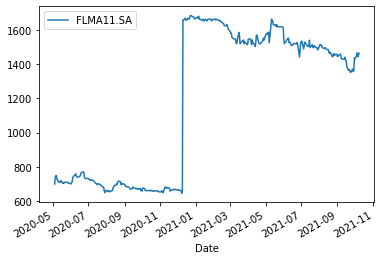

In [ ]:
carteira_full[['FLMA11.SA']].plot();

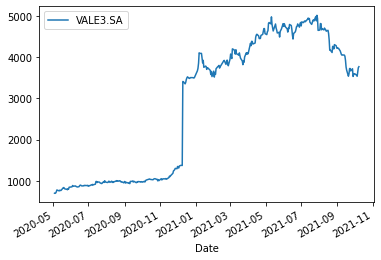

In [ ]:
carteira_full[['VALE3.SA']].plot();

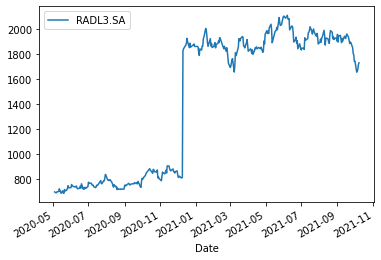

In [ ]:
carteira_full[['RADL3.SA']].plot();

In [ ]:
carteira_full.drop('PL Total', axis= 1, inplace = True)

In [ ]:
carteira_full['PL Total'] = carteira_full.iloc[:].sum(axis = 1)

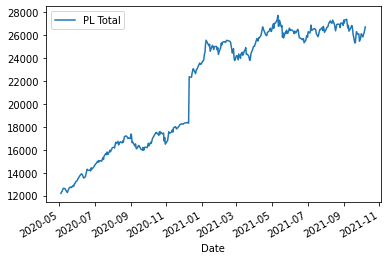

In [ ]:
carteira_full[['PL Total']].plot();

In [ ]:
carteira_full.drop(['PL Total'], axis = 1, inplace = True)

Precisamos dividir o cálculo da rentabilidade em dois momentos: antes e depois do aporte

Antes do aporte

In [ ]:
antes_aporte = carteira_full[carteira_full.index<data_aporte]
depois_aporte = carteira_full[carteira_full.index>=data_aporte]

In [ ]:
antes_aporte['PL Total'] = antes_aporte.iloc[:].sum(axis = 1)
depois_aporte['PL Total'] = depois_aporte.iloc[:].sum(axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
antes_aporte.tail()

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,,
2020-12-03,3140.394764,2131.734633,564.291347,666.981132,1817.375919,705.907961,635.294136,1532.826883,815.899673,2237.813882,1310.778667,2792.443430,18351.742427
2020-12-04,3114.008947,2156.964570,514.440079,662.578616,1825.354589,703.043514,652.941178,1584.036320,825.968390,2241.222534,1360.912393,2711.990103,18353.461233
2020-12-07,3150.351434,2154.599207,535.113158,660.377358,1804.964626,699.104873,664.705873,1553.540882,811.200972,2250.937464,1377.014854,2704.813237,18366.723937
2020-12-08,3171.260996,2157.161721,496.185755,644.968553,1820.921965,697.583150,685.294088,1533.977761,813.885917,2246.846926,1376.184968,2745.984064,18390.255864
2020-12-09,3143.381517,2143.955299,515.018524,658.176101,1814.716318,695.076767,720.588242,1550.088609,813.885917,2215.657258,1372.864830,2681.772504,18325.181883


In [ ]:
depois_aporte.head()

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,,
2020-12-10,3087.623130,2181.997355,507.533513,1658.176101,1771.276655,688.766009,714.705894,1600.722427,1825.297138,2241.222534,3411.045970,2681.772504,22370.139230
2020-12-11,3083.640347,2183.771415,481.015504,1658.176101,1778.812035,687.602350,694.117609,1586.337836,1840.885134,2254.857400,3405.428014,2681.772504,22336.416248
2020-12-14,3123.965618,2172.141902,520.567992,1669.267580,1783.687948,693.734042,647.058831,1589.214850,1864.638703,2254.857400,3352.857737,2664.775232,22336.767834
2020-12-15,3235.980406,2202.891019,529.069792,1658.176101,1801.418445,706.176493,691.176435,1602.448683,1869.834796,2257.584425,3390.981173,2747.872974,22693.610743
2020-12-16,3228.512855,2234.231289,566.774479,1658.176101,1802.305024,708.548610,685.294088,1622.011804,1889.134287,2290.648630,3460.004447,2768.647482,22914.289097


In [ ]:
dia_antes_aporte = (datetime.strptime(data_aporte, '%Y-%m-%d')- timedelta(1)).strftime('%Y-%m-%d')

In [ ]:
antes_aporte.loc[dia_antes_aporte]

AAPL34.SA     3143.381517
BOVA11.SA     2143.955299
ETH-BRL        515.018524
FLMA11.SA      658.176101
IVVB11.SA     1814.716318
KNRI11.SA      695.076767
OIBR3.SA       720.588242
PETR4.SA      1550.088609
RADL3.SA       813.885917
SMAL11.SA     2215.657258
VALE3.SA      1372.864830
WEGE3.SA      2681.772504
PL Total     18325.181883
Name: 2020-12-09 00:00:00, dtype: float64

In [ ]:
operations = pd.concat([(pd.DataFrame(antes_aporte.loc[dia_antes_aporte]).T),(pd.DataFrame(segunda_compra_df,columns = [dia_antes_aporte])).T], axis = 1)

operations = operations.groupby(lambda x:x, axis=1).sum()
operations.drop(['PL Total'], axis=1, inplace=True)
operations['PL Total'] = operations.iloc[:].sum(axis = 1)

operations

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
2020-12-09,3143.381517,2143.955299,515.018524,1658.176101,1814.716318,695.076767,720.588242,1550.088609,1813.885917,2215.657258,3372.86483,2681.772504,22325.181883


Compare 'operations' com a útlima linha antes do aporte! Precisamos anexá-la ao dataframe do após aporte

In [ ]:
depois_aporte = pd.concat([operations, depois_aporte], axis = 0)

In [ ]:
depois_aporte.head()

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
2020-12-09,3143.381517,2143.955299,515.018524,1658.176101,1814.716318,695.076767,720.588242,1550.088609,1813.885917,2215.657258,3372.864830,2681.772504,22325.181883
2020-12-10,3087.623130,2181.997355,507.533513,1658.176101,1771.276655,688.766009,714.705894,1600.722427,1825.297138,2241.222534,3411.045970,2681.772504,22370.139230
2020-12-11,3083.640347,2183.771415,481.015504,1658.176101,1778.812035,687.602350,694.117609,1586.337836,1840.885134,2254.857400,3405.428014,2681.772504,22336.416248
2020-12-14,3123.965618,2172.141902,520.567992,1669.267580,1783.687948,693.734042,647.058831,1589.214850,1864.638703,2254.857400,3352.857737,2664.775232,22336.767834
2020-12-15,3235.980406,2202.891019,529.069792,1658.176101,1801.418445,706.176493,691.176435,1602.448683,1869.834796,2257.584425,3390.981173,2747.872974,22693.610743


In [ ]:
depois_aporte.tail()

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
2021-10-04,3786.496281,2092.904122,3182.682261,1451.874525,2253.368770,645.664962,288.235297,1814.270549,1655.032634,2152.596296,3563.762303,2961.984931,25848.872930
2021-10-05,3882.534525,2091.721515,3365.673522,1466.515358,2293.439866,645.396431,288.235297,1853.971448,1660.246627,2138.790958,3538.269722,2866.510943,26091.306213
2021-10-06,3894.038858,2096.649242,3439.028040,1444.221546,2305.319266,648.484677,276.470585,1804.817845,1680.357178,2113.396154,3637.879483,2864.983324,26205.646198
2021-10-07,3961.565469,2097.634697,3456.469541,1453.205617,2337.766108,646.918154,273.529411,1802.297212,1718.343993,2113.396154,3746.458956,2868.802516,26476.387828
2021-10-08,3954.062809,2136.465208,3448.832369,1464.075219,2331.649065,648.977007,273.529411,1835.066281,1729.516553,2176.457116,3769.590973,2952.055846,26720.277857


In [ ]:
rentabilidade_antes_aporte = antes_aporte.pct_change()
rentabilidade_depois_aporte = depois_aporte.pct_change()

In [ ]:
rentabilidade_antes_aporte.tail()

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,,
2020-12-03,-0.022470,0.003712,0.032936,0.003311,-0.011334,-0.000507,0.000000,0.028174,-0.000822,0.015468,-0.011022,0.009559,0.001198
2020-12-04,-0.008402,0.011835,-0.088343,-0.006601,0.004390,-0.004058,0.027778,0.033408,0.012341,0.001523,0.038247,-0.028811,0.000094
2020-12-07,0.011671,-0.001097,0.040186,-0.003322,-0.011170,-0.005602,0.018018,-0.019252,-0.017879,0.004335,0.011832,-0.002646,0.000723
2020-12-08,0.006637,0.001189,-0.072746,-0.023333,0.008841,-0.002177,0.030973,-0.012593,0.003310,-0.001817,-0.000603,0.015221,0.001281
2020-12-09,-0.008791,-0.006122,0.037955,0.020478,-0.003408,-0.003593,0.051502,0.010503,0.000000,-0.013882,-0.002413,-0.023384,-0.003539


In [ ]:
rentabilidade_depois_aporte.head()

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
2020-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-10,-0.017738,0.017744,-0.014533,0.000000,-0.023937,-0.009079,-0.008163,0.032665,0.006291,0.011538,0.011320,0.000000,0.002014
2020-12-11,-0.001290,0.000813,-0.052249,0.000000,0.004254,-0.001689,-0.028807,-0.008986,0.008540,0.006084,-0.001647,0.000000,-0.001507
2020-12-14,0.013077,-0.005325,0.082227,0.006689,0.002741,0.008917,-0.067797,0.001814,0.012903,0.000000,-0.015437,-0.006338,0.000016
2020-12-15,0.035857,0.014156,0.016332,-0.006645,0.009940,0.017935,0.068182,0.008327,0.002787,0.001209,0.011370,0.031184,0.015976


In [ ]:
rentabilidade_antes_aporte = rentabilidade_antes_aporte.dropna()
rentabilidade_depois_aporte = rentabilidade_depois_aporte.dropna()

In [ ]:
rentabilidade_total = pd.concat([rentabilidade_antes_aporte, rentabilidade_depois_aporte], axis = 0)

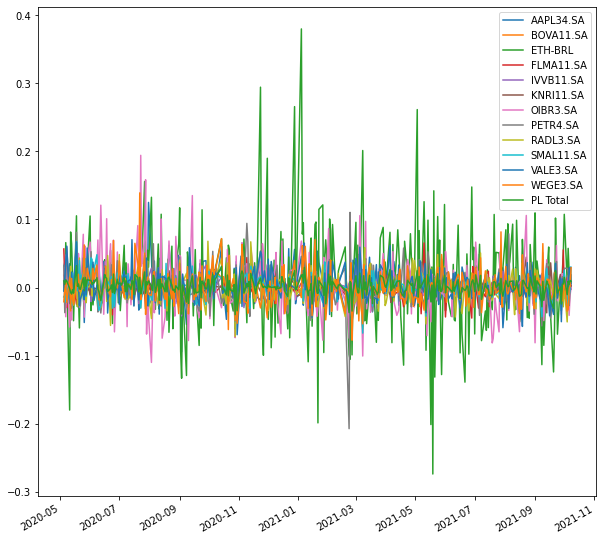

In [ ]:
rentabilidade_total.plot(figsize = (10,10));

In [ ]:
cum_daily_return = (1 + rentabilidade_total).cumprod()

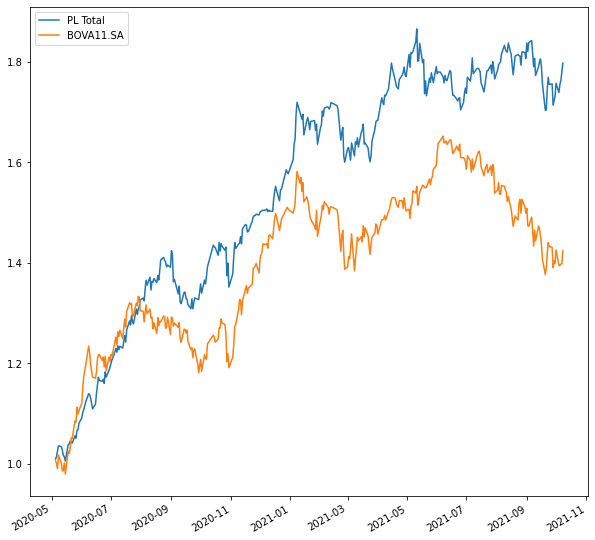

In [ ]:
cum_daily_return[['PL Total', 'BOVA11.SA']].plot(figsize = (10,10));

In [ ]:
cum_daily_return.tail()

,AAPL34.SA,BOVA11.SA,ETH-BRL,FLMA11.SA,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
2021-10-04,1.893248,1.395269,15.913411,0.823270,1.502246,0.922379,1.441176,1.814271,1.060870,1.435064,2.072238,1.974657,1.739142
2021-10-05,1.941267,1.394481,16.828368,0.831572,1.528960,0.921995,1.441176,1.853971,1.064212,1.425861,2.057414,1.911007,1.755453
2021-10-06,1.947019,1.397766,17.195140,0.818931,1.536880,0.926407,1.382353,1.804818,1.077103,1.408931,2.115335,1.909989,1.763146
2021-10-07,1.980783,1.398423,17.282348,0.824025,1.558511,0.924169,1.367647,1.802297,1.101452,1.408931,2.178471,1.912535,1.781362
2021-10-08,1.977031,1.424310,17.244162,0.830189,1.554433,0.927110,1.367647,1.835066,1.108614,1.450971,2.191922,1.968037,1.797771
